# Hate Crimes

### This proyect analyzes the evoulution of hate crimes in **Catalunya** throught the years, specially the LGBTIQ+ comunity.

In [1067]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from numpy import number


In [1068]:
df = pd.read_csv('/Users/enrique/code/EFRdev/00 - Post-Bootcamp/Hate_Crimes/data/Catalunya_Hate_Crimes.csv')
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1.0
1,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1.0
2,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1.0
3,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1.0
4,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1.0


## Checking if there are any null or nans in the dataset. If there're are we will drop them.

In [1069]:
df.isnull().sum()

Any                                                       0
Núm. Mes                                                  1
Nom Mes                                                   0
Regió Policial (RP)                                       0
Àrea Bàsica Policial (ABP)                                0
Província                                                 0
Comarca                                                   0
Municipi                                                  0
Tipus de lloc dels fets                                   0
Tipus de fet                                              0
Tipus de fet (Codi penal) o d’Infracció (altres lleis)    0
Àmbit fet                                                 0
Rol                                                       0
Sexe                                                      0
Edat                                                      0
Nombre víctimes                                           1
dtype: int64

In [1070]:
#df.isnull().sum()
df[df['Núm. Mes'].isnull()]
df = df.dropna(subset = ['Núm. Mes', 'Nombre víctimes'])
#df.isnull().sum()

In [1071]:
df.shape

(5861, 16)

## We need to turn all numbers into integers: Mes, Edad, Número de Victimas

In [1072]:
#Turning all numbers into integres
df = df.astype({'Núm. Mes': int, 'Edat': int, 'Nombre víctimes': int})
df['Núm. Mes'] = df['Núm. Mes'].apply(lambda n: f"{n:02d}")
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1
1,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1
2,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1
3,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1
4,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1


## There are some month numbers that are **wrong**...

In [1073]:
repeated = df['Núm. Mes'].unique()
repeated

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '33', '88'], dtype=object)

In [1074]:
error_33 = df[df['Núm. Mes'] == "33"]
error_88 = df[df['Núm. Mes'] == "88"]

df = df[df['Núm. Mes'] != "33"]
df = df[df['Núm. Mes'] != "88"]
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1
1,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1
2,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1
3,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1
4,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1


In [1075]:
df['Núm. Mes'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

## Merging "Any" & "Núm. Mes" to one column "Date"

In [1076]:
df['Date'] = df.apply (lambda row: datetime.strptime(f"{row['Any']}-{row['Núm. Mes']}-01", "%Y-%m-%d"), axis=1)
df = df.drop(columns=['Any', 'Núm. Mes', 'Nom Mes', 'Àrea Bàsica Policial (ABP)', 'Regió Policial (RP)', "Tipus de fet (Codi penal) o d’Infracció (altres lleis)"])
df

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,28,1,2021-01-01
1,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,27,1,2021-01-01
2,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,23,1,2021-01-01
3,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,24,1,2021-01-01
4,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,21,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
5858,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,65,1,2024-10-01
5859,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,58,1,2024-09-01
5860,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,67,1,2024-09-01
5861,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Autor,HOME,29,1,2024-09-01


In [1077]:
df['Date'].dtype

dtype('<M8[ns]')

In [1078]:
provincia_virtual = df[df['Província'] == 'Província Virtual']
provincia_virtual
df['Província'].unique()


array(['Barcelona', 'Tarragona', 'Girona', 'Lleida', 'Província Virtual'],
      dtype=object)

In [1079]:
df = df[df['Província'] != "Província Virtual"]
df

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,28,1,2021-01-01
1,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,27,1,2021-01-01
2,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,23,1,2021-01-01
3,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,24,1,2021-01-01
4,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,21,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
5858,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,65,1,2024-10-01
5859,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,58,1,2024-09-01
5860,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,67,1,2024-09-01
5861,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Autor,HOME,29,1,2024-09-01


# Cleaning text

In [1080]:
import string
import unicodedata

def cleaning_text(text):

    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = text.lower()
    text = text.replace("municipi de ", "")
    text = text.replace("resta municipis abp ", "")
    text = text.replace("abp ", "")
    text = text.replace("l'", "")
    text = text.replace("-", " ")
    text = text.replace("'", "")
    text = text.strip()

    return text


In [1081]:
#df.loc[:,'Tipus de fet'] = df['Tipus de fet'].apply(cleaning_text)
for col in df.select_dtypes(include='object').columns:df.loc[:, col] = df[col].apply(cleaning_text)

df.head(10)

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,28,1,2021-01-01
1,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,27,1,2021-01-01
2,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,23,1,2021-01-01
3,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,24,1,2021-01-01
4,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,21,1,2021-01-01
5,barcelona,bages,manresa,centre religios islamic,delicte,religios,victima,home,54,1,2021-01-01
6,barcelona,bages,manresa,centre religios islamic,delicte,religios,persona autora,home,51,1,2021-01-01
7,barcelona,maresme,cabrils,via publica urbana,delicte,etnic/origen nacional/origen racial,victima,home,19,1,2021-01-01
8,barcelona,maresme,cabrils,via publica urbana,delicte,etnic/origen nacional/origen racial,victima,home,20,1,2021-01-01
9,barcelona,maresme,premia de mar,via publica urbana,delicte,etnic/origen nacional/origen racial,persona autora,home,15,1,2021-01-01


In [1082]:
#df['Tipus de fet'] = df['Tipus de fet'].str.rstrip('s')
df['Tipus de fet'].unique()


array(['delicte', 'altres', 'infraccio administrativa', 'delictes',
       'faltes administratives', 'int. i/o xarxes',
       'infraccions administratives', 'lleis especials'], dtype=object)

In [1083]:
df.loc[:, 'Tipus de fet'] = df['Tipus de fet'].replace('infraccions administratives', 'infraccio administrativa')
df.loc [:,'Tipus de fet'] = df['Tipus de fet'].replace('delictes', 'delicte')
df['Tipus de fet'].unique()

array(['delicte', 'altres', 'infraccio administrativa',
       'faltes administratives', 'int. i/o xarxes', 'lleis especials'],
      dtype=object)

### There are some missnames and errors in **Municipi** and **Comarca**. 
We need to fix and make sure they are accurate with the real names. 

In [1084]:
df['Municipi'].unique()

array(['barcelona', 'manresa', 'cabrils', 'premia de mar',
       'mollet del valles', 'girona', 'bages', 'hospitalet de llobregat',
       'sant adria de besos', 'tarragona', 'igualada', 'calders', 'celra',
       'sant vicenc dels horts', 'reus', 'fornells de la selva',
       'terrassa', 'palafrugell', 'santa coloma de gramenet', 'vic',
       'valls', 'sant just desvern', 'rp metropolitana barcelona',
       'castellbell i el vilar', 'sabadell', 'sant joan de vilatorrada',
       'badalona', 'rubi', 'berga', 'baix emporda   la bisbal',
       'mont ras', 'mataro', 'lleida', 'tarragones', 'torredembarra',
       'baix camp   priorat', 'sense especificar',
       'sant feliu de llobregat', 'sant andreu de la barca',
       'lloret de mar', 'malgrat de mar', 'arenys de mar',
       'selva interior', 'caldes de malavella',
       'els hostalets de pierola', 'salou', 'granollers', 'cardedeu',
       'la bisbal demporda', 'sitges', 'sant feliu de guixols',
       'vilanova i la geltru', 

In [1085]:
#df.loc [:,'Comarca'] = df['Comarca'].replace('el maresme', 'maresme')
df['Comarca'].unique()

array(['barcelones', 'bages', 'maresme', 'valles oriental',
       'valles occidental', 'tarragones', 'anoia', 'moianes', 'girones',
       'baix llobregat', 'baix camp', 'baix emporda', 'osona', 'alt camp',
       'bergueda', 'segria', 'priorat', 'selva', 'garraf',
       'pla de estany', 'val daran', 'urgell', 'alt emporda',
       'alt penedes', 'baix penedes', 'pla durgell', 'solsones',
       'baix ebre', 'ripolles', 'garrotxa', 'montsia', 'garrigues', 'vic',
       'el maresme', 'alt urgell', 'alta ribagorca', 'noguera',
       'terra alta', 'cerdanya', 'pallars jussa', 'conca de barbera',
       'segarra', 'ribera debre'], dtype=object)

In [1086]:
# Listado oficial de municipios y comarcas
municipios_cat = [
    'barcelona', 'manresa', 'cabrils', 'premia de mar', 'mollet del valles', 'girona', 'tarragona', 'igualada',
    'calders', 'celra', 'reus', 'terrassa', 'palafrugell', 'vic', 'valls', 'sabadell', 'badalona', 'rubi', 'berga',
    'mataro', 'lleida', 'torredembarra', 'sant feliu de llobregat', 'lloret de mar', 'malgrat de mar', 'arenys de mar',
    'caldes de malavella', 'salou', 'granollers', 'cardedeu', 'la bisbal demporda', 'sitges', 'sant cugat del valles',
    'vilanova i la geltru', 'blanes', 'caldes de montbui', 'canovelles', 'calella', 'cadaques', 'vila seca',
    'el vendrell', 'viladecans', 'abrera', 'martorell', 'navarcles', 'gava', 'mollerussa', 'ripollet', 'castelldefels',
    'montornes del valles', 'calonge', 'bordils', 'tortosa', 'capellades', 'ripoll', 'roses', 'figueres',
    'canet de mar', 'castello dempuries', 'sant celoni', 'el bruc', 'cerdanyola del valles', 'sils', 'olot',
    'montmelo', 'sallent', 'argentona', 'suria', 'gurb', 'juneda', 'bellpuig', 'canyelles', 'llinars del valles',
    'sant boi de llobregat', 'bescano', 'calafell', 'alella', 'vilassar de mar', 'montcada i reixac', 'cornella de llobregat',
    'el prat de llobregat', 'santa perpetua de mogoda', 'parets del valles', 'esparreguera'
    # (puedes ampliar la lista con los más de 900 municipios)
]

comarcas_cat = [
    'bages', 'anoia', 'osona', 'garraf', 'selva', 'bergueda', 'girones', 'moianes', 'valles occidental',
    'valles oriental', 'alt emporda', 'baix emporda', 'baix camp', 'alt camp', 'tarragones', 'segria', 'urgell',
    'alta ribagorca', 'terra alta', 'montsia', 'ripolles', 'pla de lestany', 'conca de barbera', 'cerdanya',
    'pallars jussa', 'garrigues', 'alt urgell', 'noguera', 'baix ebre', 'solsones', 'segarra', 'ribera debre',
    'baix penedes', 'alt penedes', 'pla durgell', 'val daran'
    # (añade más si los necesitas)
]


In [1087]:
import difflib

# 1. Fixing 'Municipi' names in df against municipios_cat
def fix_names(column, valid_names):
    def closest_match(name):
        matches = difflib.get_close_matches(name, valid_names, n=1, cutoff=0.8)
        return matches[0] if matches else name
    return column.apply(closest_match)

df['Municipi_clean'] = fix_names(df['Municipi'], municipios_cat)

# 2. Fixing 'Comarca' names in df against comarcas_cat
df['Comarca_clean'] = fix_names(df['Comarca'], comarcas_cat)

df.head()

/var/folders/52/7ccrs33x6bl334rw1cb76c0h0000gn/T/ipykernel_12335/912673018.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Municipi_clean'] = fix_names(df['Municipi'], municipios_cat)
/var/folders/52/7ccrs33x6bl334rw1cb76c0h0000gn/T/ipykernel_12335/912673018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comarca_clean'] = fix_names(df['Comarca'], comarcas_cat)


,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date,Municipi_clean,Comarca_clean
0,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,28,1,2021-01-01,barcelona,barcelones
1,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,27,1,2021-01-01,barcelona,barcelones
2,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,23,1,2021-01-01,barcelona,barcelones
3,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,24,1,2021-01-01,barcelona,barcelones
4,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,21,1,2021-01-01,barcelona,barcelones


In [1088]:
df['Municipi'].unique()

array(['barcelona', 'manresa', 'cabrils', 'premia de mar',
       'mollet del valles', 'girona', 'bages', 'hospitalet de llobregat',
       'sant adria de besos', 'tarragona', 'igualada', 'calders', 'celra',
       'sant vicenc dels horts', 'reus', 'fornells de la selva',
       'terrassa', 'palafrugell', 'santa coloma de gramenet', 'vic',
       'valls', 'sant just desvern', 'rp metropolitana barcelona',
       'castellbell i el vilar', 'sabadell', 'sant joan de vilatorrada',
       'badalona', 'rubi', 'berga', 'baix emporda   la bisbal',
       'mont ras', 'mataro', 'lleida', 'tarragones', 'torredembarra',
       'baix camp   priorat', 'sense especificar',
       'sant feliu de llobregat', 'sant andreu de la barca',
       'lloret de mar', 'malgrat de mar', 'arenys de mar',
       'selva interior', 'caldes de malavella',
       'els hostalets de pierola', 'salou', 'granollers', 'cardedeu',
       'la bisbal demporda', 'sitges', 'sant feliu de guixols',
       'vilanova i la geltru', 

In [1089]:
df['Municipi_clean'].unique()


array(['barcelona', 'manresa', 'cabrils', 'premia de mar',
       'mollet del valles', 'girona', 'bages', 'hospitalet de llobregat',
       'sant adria de besos', 'tarragona', 'igualada', 'calders', 'celra',
       'sant vicenc dels horts', 'reus', 'fornells de la selva',
       'terrassa', 'palafrugell', 'santa coloma de gramenet', 'vic',
       'valls', 'sant just desvern', 'rp metropolitana barcelona',
       'castellbell i el vilar', 'sabadell', 'sant joan de vilatorrada',
       'badalona', 'rubi', 'berga', 'baix emporda   la bisbal',
       'mont ras', 'mataro', 'lleida', 'torredembarra',
       'baix camp   priorat', 'sense especificar',
       'sant feliu de llobregat', 'sant andreu de la barca',
       'lloret de mar', 'malgrat de mar', 'arenys de mar',
       'selva interior', 'caldes de malavella',
       'els hostalets de pierola', 'salou', 'granollers', 'cardedeu',
       'la bisbal demporda', 'sitges', 'sant feliu de guixols',
       'vilanova i la geltru', 'blanes', 'san

In [1090]:
df['Comarca'].unique()

array(['barcelones', 'bages', 'maresme', 'valles oriental',
       'valles occidental', 'tarragones', 'anoia', 'moianes', 'girones',
       'baix llobregat', 'baix camp', 'baix emporda', 'osona', 'alt camp',
       'bergueda', 'segria', 'priorat', 'selva', 'garraf',
       'pla de estany', 'val daran', 'urgell', 'alt emporda',
       'alt penedes', 'baix penedes', 'pla durgell', 'solsones',
       'baix ebre', 'ripolles', 'garrotxa', 'montsia', 'garrigues', 'vic',
       'el maresme', 'alt urgell', 'alta ribagorca', 'noguera',
       'terra alta', 'cerdanya', 'pallars jussa', 'conca de barbera',
       'segarra', 'ribera debre'], dtype=object)

In [1091]:
df['Comarca_clean'].unique()

array(['barcelones', 'bages', 'maresme', 'valles oriental',
       'valles occidental', 'tarragones', 'anoia', 'moianes', 'girones',
       'baix llobregat', 'baix camp', 'baix emporda', 'osona', 'alt camp',
       'bergueda', 'segria', 'priorat', 'selva', 'garraf',
       'pla de lestany', 'val daran', 'urgell', 'alt emporda',
       'alt penedes', 'baix penedes', 'pla durgell', 'solsones',
       'baix ebre', 'ripolles', 'garrotxa', 'montsia', 'garrigues', 'vic',
       'el maresme', 'alt urgell', 'alta ribagorca', 'noguera',
       'terra alta', 'cerdanya', 'pallars jussa', 'conca de barbera',
       'segarra', 'ribera debre'], dtype=object)

### Now we are cleaning the **Rol** column

In [1092]:
df['Rol'].unique()
df.loc [:,'Rol'] = df['Rol'].replace('persona autora', 'autor')
df['Rol'].unique()

array(['victima', 'autor'], dtype=object)

# Agrupaciones por:
- Numero de **víctimas**
- Numero de **autores**
- Delitos por **municipio**
- Delitos por **fecha**


## Primero separar:
- Rol: victima / autor

In [1093]:
df = pd.get_dummies(df, columns=['Rol'])

In [ ]:
df.drop(columns=['Comarca','Municipi'])

,Província,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Sexe,Edat,Nombre víctimes,Date,Municipi_clean,Comarca_clean,Rol_autor,Rol_victima
0,barcelona,via publica urbana,delicte,lgtbi fobia,home,28,1,2021-01-01,barcelona,barcelones,False,True
1,barcelona,via publica urbana,delicte,lgtbi fobia,home,27,1,2021-01-01,barcelona,barcelones,False,True
2,barcelona,via publica urbana,delicte,lgtbi fobia,dona,23,1,2021-01-01,barcelona,barcelones,True,False
3,barcelona,via publica urbana,delicte,lgtbi fobia,home,24,1,2021-01-01,barcelona,barcelones,False,True
4,barcelona,via publica urbana,delicte,lgtbi fobia,dona,21,1,2021-01-01,barcelona,barcelones,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5858,barcelona,sense especificar,delicte,etnic/origen nacional/origen racial,home,65,1,2024-10-01,sense especificar,valles occidental,False,True
5859,barcelona,sense especificar,delicte,etnic/origen nacional/origen racial,home,58,1,2024-09-01,sense especificar,valles occidental,False,True
5860,barcelona,sense especificar,delicte,etnic/origen nacional/origen racial,home,67,1,2024-09-01,sense especificar,valles occidental,False,True
5861,barcelona,sense especificar,delicte,etnic/origen nacional/origen racial,home,29,1,2024-09-01,sense especificar,valles occidental,True,False


In [1112]:
# Agrupar por Numero de Victimas
df_victimas = df[df['Rol_victima'] == True]
df_group_by_victimes = df_victimas.groupby(['Date','Província', 'Comarca_clean', 'Municipi_clean', 'Tipus de fet', 'Àmbit fet', 'Sexe']) ['Nombre víctimes'].sum().reset_index()
df_group_by_victimes

,Date,Província,Comarca_clean,Municipi_clean,Tipus de fet,Àmbit fet,Sexe,Nombre víctimes
0,2021-01-01,barcelona,anoia,igualada,delicte,orientacio politica,home,1
1,2021-01-01,barcelona,bages,manresa,delicte,religios,home,1
2,2021-01-01,barcelona,barcelones,bages,delicte,religios,home,1
3,2021-01-01,barcelona,barcelones,barcelona,delicte,etnic/origen nacional/origen racial,dona,1
4,2021-01-01,barcelona,barcelones,barcelona,delicte,etnic/origen nacional/origen racial,home,2
...,...,...,...,...,...,...,...,...
2081,2024-12-01,lleida,segria,sense especificar,delicte,islamofobia,dona,1
2082,2024-12-01,lleida,urgell,sense especificar,delicte,etnic/origen nacional/origen racial,dona,1
2083,2024-12-01,tarragona,baix ebre,sense especificar,altres,islamofobia,dona,1
2084,2024-12-01,tarragona,baix ebre,sense especificar,delicte,lgtbi fobia,home,2


In [1113]:
# Agrupar por Municipios
df_group_by_Municipi = df.groupby(['Date','Província', 'Comarca_clean', 'Nombre víctimes', 'Tipus de fet', 'Àmbit fet', 'Rol_victima', 'Sexe']) ['Municipi_clean'].sum().reset_index()
df_group_by_Municipi

,Date,Província,Comarca_clean,Nombre víctimes,Tipus de fet,Àmbit fet,Rol_victima,Sexe,Municipi_clean
0,2021-01-01,barcelona,anoia,1,delicte,orientacio politica,True,home,igualada
1,2021-01-01,barcelona,bages,1,delicte,religios,False,home,manresa
2,2021-01-01,barcelona,bages,1,delicte,religios,True,home,manresa
3,2021-01-01,barcelona,barcelones,1,altres,lgtbi fobia,True,home,sant adria de besos
4,2021-01-01,barcelona,barcelones,1,delicte,etnic/origen nacional/origen racial,False,dona,barcelona
...,...,...,...,...,...,...,...,...,...
3354,2024-12-01,tarragona,baix ebre,1,altres,islamofobia,True,dona,sense especificar
3355,2024-12-01,tarragona,baix ebre,1,delicte,lgtbi fobia,False,home,sense especificar
3356,2024-12-01,tarragona,baix ebre,1,delicte,lgtbi fobia,True,home,sense especificarsense especificar
3357,2024-12-01,tarragona,tarragones,1,delicte,lgtbi fobia,False,dona,sense especificar


In [1114]:
df_group_by_Date = df.groupby(['Municipi_clean','Província', 'Comarca_clean', 'Nombre víctimes', 'Tipus de fet', 'Àmbit fet', 'Rol_victima', 'Sexe']) ['Date'].min().reset_index()
df_group_by_Date

,Municipi_clean,Província,Comarca_clean,Nombre víctimes,Tipus de fet,Àmbit fet,Rol_victima,Sexe,Date
0,abrera,barcelona,baix llobregat,1,delicte,lgtbi fobia,True,dona,2021-06-01
1,aiguaviva,girona,girones,1,delicte,orientacio politica,True,home,2021-05-01
2,albatarrec,lleida,segria,1,delicte,orientacio politica,True,home,2021-10-01
3,alella,barcelona,maresme,1,delicte,lgtbi fobia,True,dona,2021-12-01
4,alt emporda roses,girona,alt emporda,1,delicte,etnic/origen nacional/origen racial,False,home,2021-08-01
...,...,...,...,...,...,...,...,...,...
1604,vilassar de mar,barcelona,el maresme,1,delicte,etnic/origen nacional/origen racial,True,dona,2022-08-01
1605,vilassar de mar,barcelona,el maresme,1,delicte,etnic/origen nacional/origen racial,True,home,2022-08-01
1606,vilassar de mar,barcelona,el maresme,1,delicte,lgtbi fobia,False,home,2022-01-01
1607,vilassar de mar,barcelona,el maresme,1,delicte,lgtbi fobia,True,home,2022-01-01


## Agrupación de delitos (todos) por Provincia, Comarca y Municipio

In [1148]:
df_hate_crimes = df.groupby(['Date','Província', 'Comarca_clean', 'Municipi_clean', 'Àmbit fet'])['Nombre víctimes'].sum().reset_index()
df_hate_crimes

,Date,Província,Comarca_clean,Municipi_clean,Àmbit fet,Nombre víctimes
0,2021-01-01,barcelona,anoia,igualada,orientacio politica,1
1,2021-01-01,barcelona,bages,manresa,religios,2
2,2021-01-01,barcelona,barcelones,bages,religios,1
3,2021-01-01,barcelona,barcelones,barcelona,etnic/origen nacional/origen racial,5
4,2021-01-01,barcelona,barcelones,barcelona,lgtbi fobia,14
...,...,...,...,...,...,...
1784,2024-12-01,lleida,segria,sense especificar,islamofobia,2
1785,2024-12-01,lleida,urgell,sense especificar,etnic/origen nacional/origen racial,2
1786,2024-12-01,tarragona,baix ebre,sense especificar,islamofobia,2
1787,2024-12-01,tarragona,baix ebre,sense especificar,lgtbi fobia,3


# Visualizacion: Delitos de Odio en Cataluña

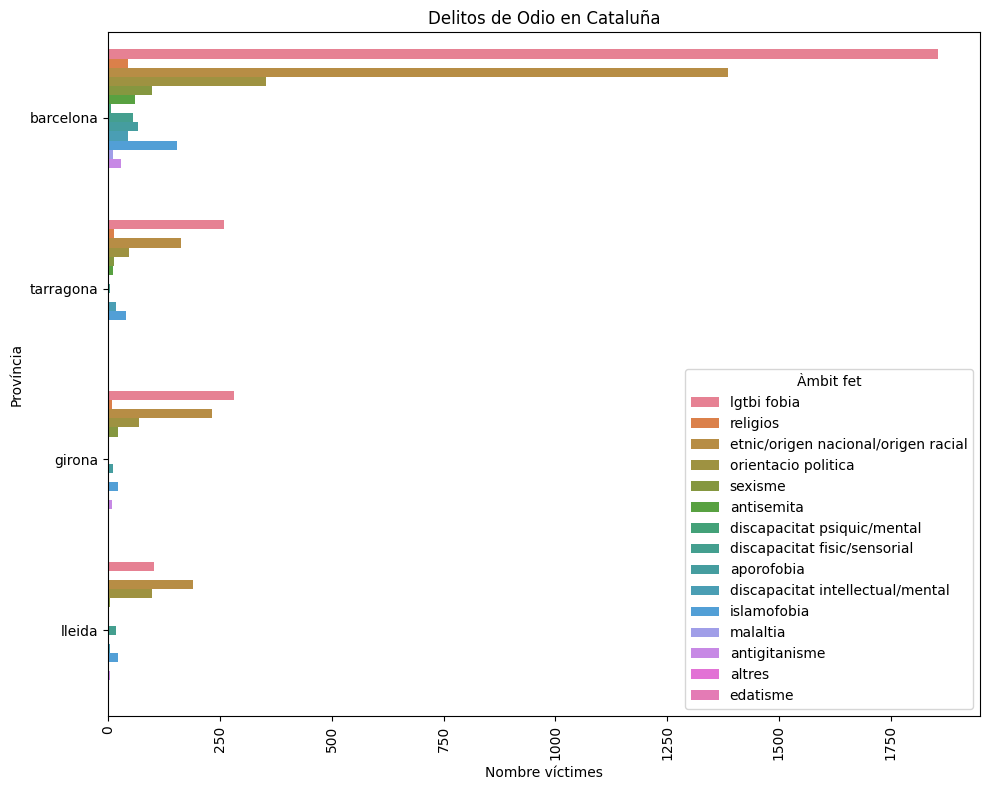

In [1150]:
plt.figure(figsize=(10,8))

sns.barplot( df, x='Nombre víctimes', y='Província', hue ='Àmbit fet', estimator=sum)
plt.xticks(rotation =90)
plt.title('Delitos de Odio en Cataluña')
plt.tight_layout()
plt.show()

## Agrupación por delitos LGBTI

In [1118]:
df_LGBTI = df[df["Àmbit fet"] == "lgtbi fobia"]
df_group_by_LGBTI = df_LGBTI.groupby('Date')['Nombre víctimes'].sum().reset_index()

# Visualizaciones

- Vizualización de tipos de hechos
- Evolucion de la discriminación LGBT en el tiempo
- Discriminación LBTI por provincia, comarca y municipio

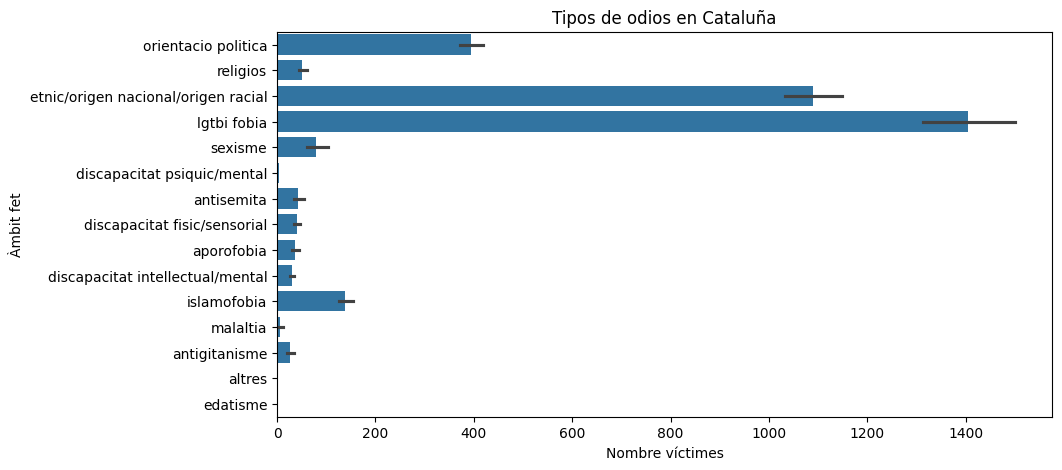

In [1142]:
#Vizualización de tipos de odios

plt.figure(figsize=(10, 5))
sns.barplot(df_group_by_victimes, x='Nombre víctimes', y='Àmbit fet' , estimator=sum)
plt.title('Tipos de odios en Cataluña')
plt.show()


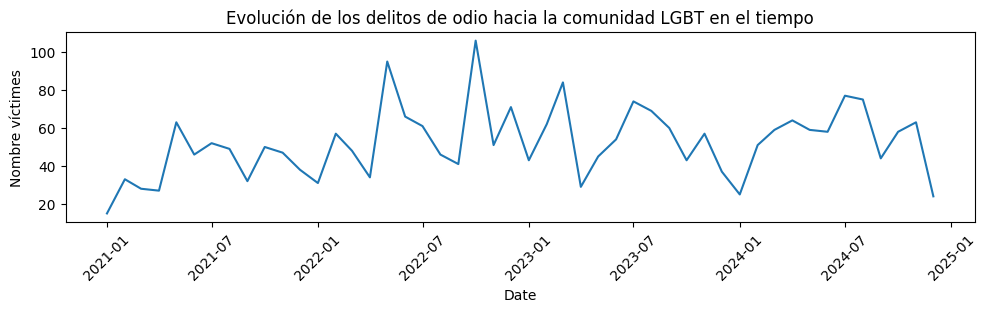

In [1120]:
#Evolucion de la discriminación LGBT en el tiempo

plt.figure(figsize=(10,3))
sns.lineplot(data=df_group_by_LGBTI, x='Date', y="Nombre víctimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Evolución de los delitos de odio hacia la comunidad LGBT en el tiempo')
plt.show()


In [1128]:
df.columns

Index(['Província', 'Comarca', 'Municipi', 'Tipus de lloc dels fets',
       'Tipus de fet', 'Àmbit fet', 'Sexe', 'Edat', 'Nombre víctimes', 'Date',
       'Municipi_clean', 'Comarca_clean', 'Rol_autor', 'Rol_victima'],
      dtype='object')

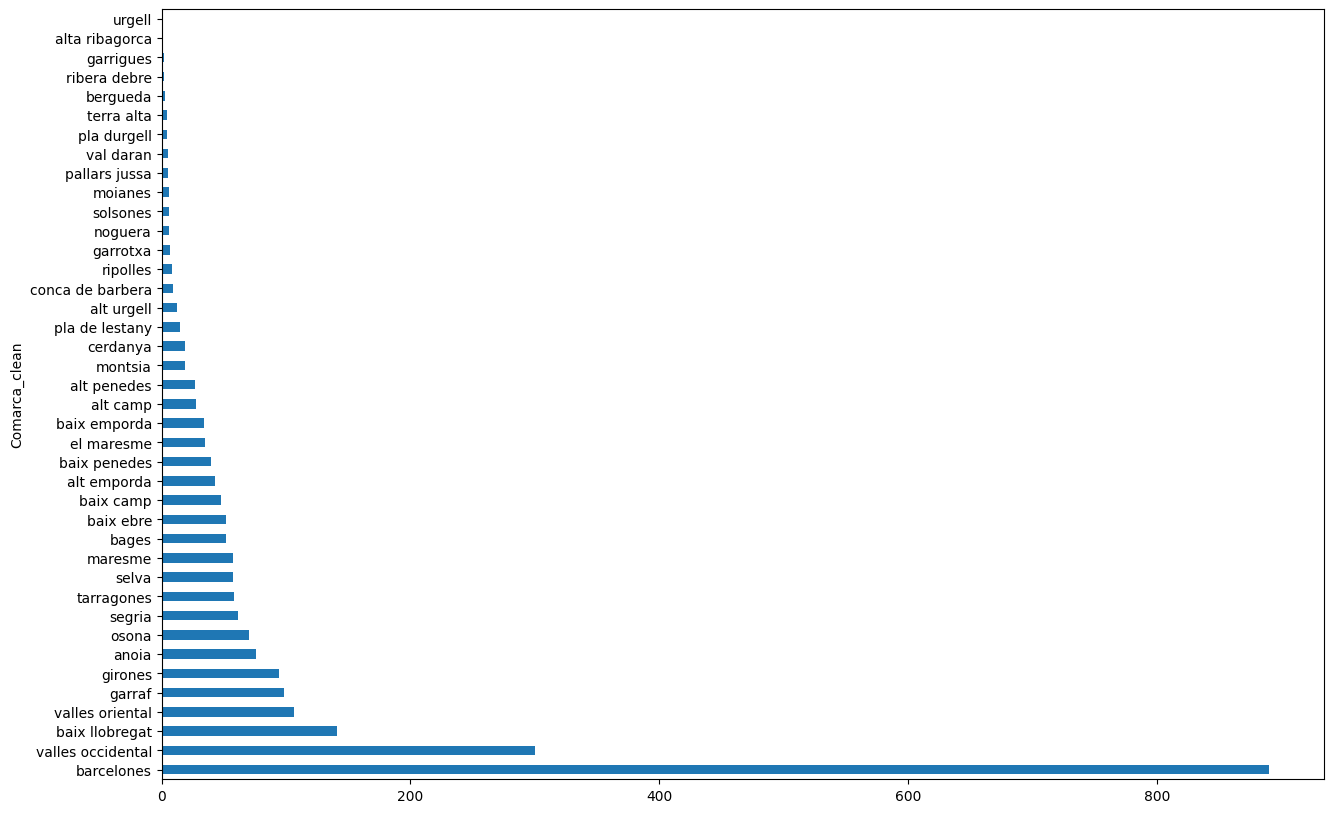

In [ ]:
# Discriminación LGBT por comarca

df_LGBTI = df[df["Àmbit fet"] == "lgtbi fobia"]
df_group_LGBTI = df_LGBTI.groupby(['Província', 'Comarca_clean', 'Municipi_clean'])['Nombre víctimes'].sum().reset_index()

"""
pivot = df_group_LGBTI.pivot_table(index='Comarca_clean', columns='Municipi_clean', values= 'Nombre víctimes', fill_value=0)

plt.figure(figsize = (15,10))
sns.heatmap(pivot , cmap='Reds')
plt.title('Delitos de odio LGBT por provincia, comarca y municipio')
"""

comarca_counts = df_group_LGBTI.groupby('Comarca_clean')['Nombre víctimes'].sum().sort_values(ascending=False)
plt.figure(figsize = (15,10))
comarca_counts.plot(kind='barh')
plt.show()
